<a href="https://colab.research.google.com/github/WahyuSR1F/Model_ml_kalsifikasi_gambar_bantu_gunting_kertas/blob/main/Model_ml_kalsifikasi_gambar_bantu_gunting_kertas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Profile :

- Nama : Wahyu Sahri Rhamadhan
- Username : wahyu_rhamadhan
- Email : sahri2827@gmail.com
- Headline : Student Mechine Learning Program
- tentang saya:
- Saya Wahyu Sahri Rhamadhan, salah satu mahasiswa dari Jurusan Teknik Informatika dengan Program Studi D4 Teknologi Rekayasa Perangkat Lunak Politeknik Negeri Banyuwangi. Selama Proses berkuliah, saya memiliki pengalaman pada beberapa program PBL (Project Base Learning) untuk memberikan Solusi IT dalam studi kasus yang nyata. Tidak hanya itu, saat ini saya mengikuti salah satu program Kampus Merdeka yaitu Bangkit Program mengambil patch learning Cloud Computing dimana memberikan pengalaman terkait kebutuhan dalam dunia industri digital
- Adress :  Mojokerto-Jawa Timur
- Pekerjaan : Pelajar






disini saya akan membuat sebuah konsep pelatihan Model Ml dimana melakukan 2 proses pelatihan dan validasi yang digunakan


catatan : saya ada kendala soal pengambilan dataset, karena kendala waktu maka saya mengunakan kaggle

### Melakukan import data

In [19]:
import zipfile
import os
import PIL
import numpy as np
import tensorflow as tf
import shutil
import IPython.display as display
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image, ImageOps

### Mengambil Dataset

In [2]:
!pip install -q kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'drgfreeman/rockpaperscissors'

ERROR: Could not find a version that satisfies the requirement kaggle.json (from versions: none)
ERROR: No matching distribution found for kaggle.json
 97% 296M/306M [00:01<00:00, 192MB/s]
100% 306M/306M [00:01<00:00, 161MB/s]


In [3]:
dataset_dir = 'dataset_raw'
os.mkdir(dataset_dir)

# Mencari target peletakan Lokasi File

In [4]:
target_file = 'rockpaperscissors.zip'

extracting = zipfile.ZipFile(target_file, 'r')

extracting.extractall(dataset_dir)

extracting.close()

### Melakukan pemisanaan training dan pengujian data

In [ ]:
# paper



# 60 % -> training
# paper1.png
# paper2.png
# paper3.png


# 40 % -> validation
# paper4.png
# paper5.png

In [5]:
dataset_dir = os.path.join(dataset_dir, 'rps-cv-images')
# dataset_raw/rps-cv-images

In [6]:
classdir_list = ['paper', 'rock', 'scissors']

In [7]:
# 60% dataset unutk training
training_percentage = 0.6

In [8]:
training_dataset_dir = 'training'
validation_dataset_dir = 'validation'

In [9]:
os.mkdir(training_dataset_dir)
os.mkdir(validation_dataset_dir)

### Proses pemisahan validasi

In [10]:
for dirname in classdir_list:
  classpath = os.path.join(dataset_dir, dirname)
  # dataset_raw/rps-cv-images/scissors

  counter = 0
  training_length = training_percentage * len(os.listdir(classpath))

  training_classpath = os.path.join(training_dataset_dir, dirname)
  # training/paper
  validation_classpath = os.path.join(validation_dataset_dir, dirname)

  os.mkdir(training_classpath)
  os.mkdir(validation_classpath)

  for filename in os.listdir(classpath):
    filepath = os.path.join(classpath, filename)
    if counter < training_length:
      shutil.move(filepath, training_classpath)
    else:
      shutil.move(filepath, validation_classpath)

    counter += 1

## Melaukan Iniliasi prosess Training Data set

In [11]:
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale = 1./255,
    zoom_range = 0.25,
    horizontal_flip = True,
    vertical_flip = True
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale = 1./255
)

### Melakukan pengambilan data Training Dataset

In [12]:
training_generator = training_datagen.flow_from_directory(
    training_dataset_dir,
    target_size = (150, 150),
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_dir,
    target_size = (150, 150),
    class_mode = 'categorical'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### Melakukan Training dan Validation Data

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), input_shape = (150, 150, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(65, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(
    metrics = ['acc'],
    loss = 'categorical_crossentropy',
    optimizer = 'adam'
)

model.fit(
    training_generator,
    validation_data = validation_generator,
    epochs = 10
)

Epoch 1/10
42/42 [==============================] - 31s 720ms/step - loss: 0.8747 - acc: 0.5982 - val_loss: 0.5559 - val_acc: 0.8021
Epoch 2/10
42/42 [==============================] - 30s 709ms/step - loss: 0.6005 - acc: 0.7755 - val_loss: 0.3827 - val_acc: 0.8776
Epoch 3/10
42/42 [==============================] - 30s 709ms/step - loss: 0.3897 - acc: 0.8584 - val_loss: 0.2624 - val_acc: 0.9119
Epoch 4/10
42/42 [==============================] - 30s 711ms/step - loss: 0.2955 - acc: 0.8912 - val_loss: 0.2742 - val_acc: 0.9039
Epoch 5/10
42/42 [==============================] - 36s 850ms/step - loss: 0.2384 - acc: 0.9239 - val_loss: 0.1613 - val_acc: 0.9394
Epoch 6/10
42/42 [==============================] - 30s 711ms/step - loss: 0.2021 - acc: 0.9269 - val_loss: 0.1465 - val_acc: 0.9485
Epoch 7/10
42/42 [==============================] - 29s 699ms/step - loss: 0.1929 - acc: 0.9300 - val_loss: 0.1082 - val_acc: 0.9622
Epoch 8/10
42/42 [==============================] - 32s 763ms/step - 

In [16]:
# melakukan testing

sample_image1 = 'rock.png'
sample_image2 = 'paper.png'
sample_image3 = 'cut_online.png'


pengujian 1 :


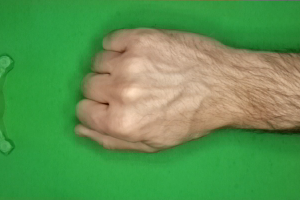

1/1 [==============================] - 0s 133ms/step
[[2.5822581e-03 9.9741709e-01 6.3042324e-07]]
Predicted Class: rock
pengujian 2 :


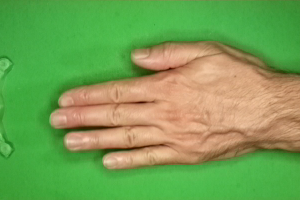

1/1 [==============================] - 0s 24ms/step
[[9.9864203e-01 1.2969298e-03 6.1038358e-05]]
Predicted Class: paper
pengujian 3 :


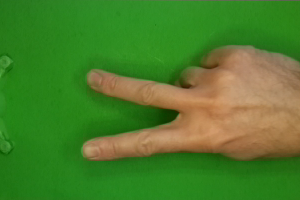

1/1 [==============================] - 0s 27ms/step
[[2.3618448e-03 2.4996355e-06 9.9763560e-01]]
Predicted Class: scissors


In [18]:
def test_model(model, img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array)

    print(predictions)

    # Get the predicted class label
    predicted_class = np.argmax(predictions)

    # Map the class index to class name
    class_names = ['paper', 'rock', 'scissors']
    predicted_class_name = class_names[predicted_class]

    return predicted_class, predicted_class_name

# Example usage:

#melakukan pengetesan apakah gambar sudah benar bisa di bedakan
img_path = sample_image1
print("pengujian 1 :")
img = Image.open(img_path)
display.display(img)
predicted_class, predicted_class_name = test_model(model, img_path)
print(f'Predicted Class: {predicted_class_name}')


img_path = sample_image2
print("pengujian 2 :")
img = Image.open(img_path)
display.display(img)
predicted_class, predicted_class_name = test_model(model, img_path)
print(f'Predicted Class: {predicted_class_name}')


img_path = sample_image3
print("pengujian 3 :")
img = Image.open(img_path)
display.display(img)
predicted_class, predicted_class_name = test_model(model, img_path)
print(f'Predicted Class: {predicted_class_name}')



Silakan upload gambar:


Saving paper.png to paper (1).png
1/1 [==============================] - 0s 42ms/step
[[9.9864203e-01 1.2969298e-03 6.1038358e-05]]


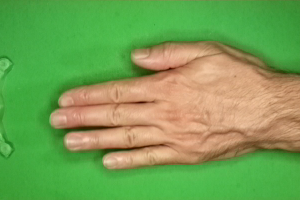

Predicted Class: paper


In [20]:
def test_model(model):
    # Upload image
    print("Silakan upload gambar:")
    uploaded = files.upload()

    # Get the first uploaded image
    img_path = list(uploaded.keys())[0]

    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array)

    print(predictions)

    # Get the predicted class label
    predicted_class = np.argmax(predictions)

    # Map the class index to class name
    class_names = ['paper', 'rock', 'scissors']
    predicted_class_name = class_names[predicted_class]

    # Display the uploaded image
    img = Image.open(img_path)
    display.display(img)

    return predicted_class, predicted_class_name

# Assuming you have already loaded and compiled your model
# model = load_model('path/to/your/model.h5')

# Test the model with the uploaded image
predicted_class, predicted_class_name = test_model(model)
print(f'Predicted Class: {predicted_class_name}')

Pengujian 1:
Silakan upload gambar:


Saving paper.png to paper.png
1/1 [==============================] - 0s 26ms/step


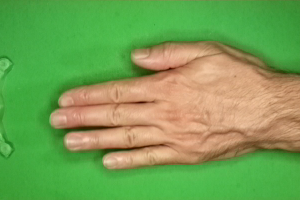

Predicted Class: paper
--------------------------------------------------
Pengujian 2:
Silakan upload gambar:


In [ ]:

def test_model(model, img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class label
    predicted_class = np.argmax(predictions)

    # Map the class index to class name
    class_names = ['paper', 'rock', 'scissors']
    predicted_class_name = class_names[predicted_class]

    # Display the uploaded image
    img = Image.open(img_path)
    display.display(img)

    return predicted_class, predicted_class_name

# Assuming you have already loaded and compiled your model
# model = load_model('path/to/your/model.h5')

# Set the number of iterations
num_iterations = 3

# Run the testing process for each iteration
for i in range(num_iterations):
    print(f"Pengujian {i + 1}:")

    # Upload image
    print("Silakan upload gambar:")
    uploaded = files.upload()

    # Get the first uploaded image
    img_path = list(uploaded.keys())[0]

    # Test the model with the uploaded image
    predicted_class, predicted_class_name = test_model(model, img_path)
    print(f'Predicted Class: {predicted_class_name}')
    print('-' * 50)
